In [1]:
import gzip
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("ts.csv")
df.head()

,timestamp,parameter,value_hrf
0,2019-02-04 00:00:00,co,0.675772
1,2019-02-04 00:00:00,humidity,73.300410
2,2019-02-04 00:00:00,no2,0.005140
3,2019-02-04 00:00:00,o3,1.050480
4,2019-02-04 00:00:00,pm1,1.724000


In [5]:
df.parameter.unique()

array(['co', 'humidity', 'no2', 'o3', 'pm1', 'pm10', 'pm2_5', 'so2',
       'temperature'], dtype=object)

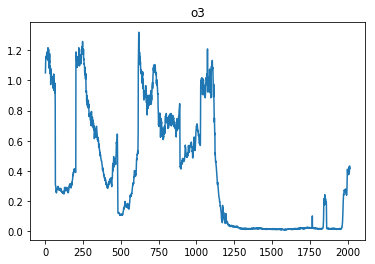

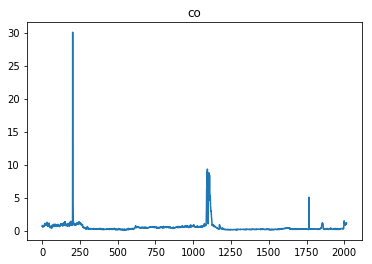

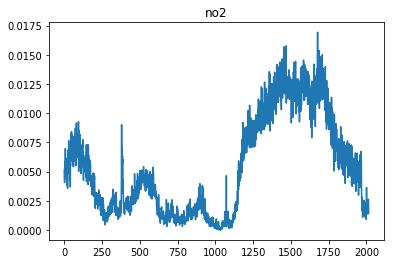

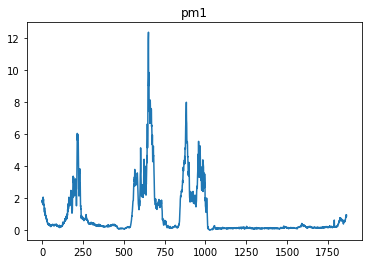

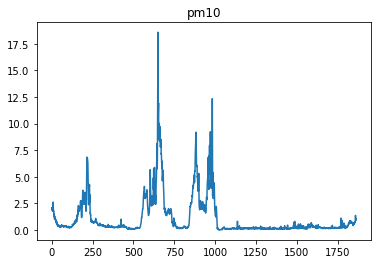

In [8]:
for each in ['o3', 'co', 'no2','pm1', 'pm10']:
    plt.plot(df[df["parameter"] == each].value_hrf.values)
    plt.title(each)
    plt.show()

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.shape

(19393788, 9)

In [4]:
df.head()

,timestamp,node_id,subsystem,sensor,parameter,value_hrf,hrf_unit,hrf_minval,hrf_maxval
0,2019/02/04 00:00:01,001e0610e532,lightsense,apds_9006_020,intensity,0.241,lux,0.0,1000.0
1,2019/02/04 00:00:01,001e0610e532,lightsense,hih6130,humidity,41.090,RH,0.0,100.0
2,2019/02/04 00:00:01,001e0610e532,lightsense,hih6130,temperature,26.190,C,-25.0,85.0
3,2019/02/04 00:00:01,001e0610e532,lightsense,mlx75305,intensity,2.032,uW/cm^2,0.0,160.0
4,2019/02/04 00:00:01,001e0610e532,lightsense,tmp421,temperature,23.590,C,-55.0,127.0


In [5]:
def conc_fixer(row):
    if row['parameter'] == 'concentration':
        return row['sensor']
    else:
        return row['parameter']

In [6]:
df['parameter'] = df.apply(lambda x : conc_fixer(x), axis = 1)
    

In [7]:
df.drop(columns = ['hrf_minval', 'hrf_maxval'], inplace = True)

In [8]:
df = df.groupby(by = ['timestamp', 'node_id','parameter','hrf_unit']).mean().reset_index()

In [9]:
df.head()

,timestamp,node_id,parameter,hrf_unit,value_hrf
0,2019/02/04 00:00:01,001e0610e532,humidity,RH,60.093333
1,2019/02/04 00:00:01,001e0610e532,intensity,lux,0.241000
2,2019/02/04 00:00:01,001e0610e532,intensity,uW/cm^2,0.570000
3,2019/02/04 00:00:01,001e0610e532,pressure,hPa,992.930000
4,2019/02/04 00:00:01,001e0610e532,temperature,C,16.155714


In [10]:
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.strptime(x, "%Y/%m/%d %H:%M:%S"))

In [11]:
df.set_index('timestamp', inplace = True)

In [12]:
df.parameter.unique()

array(['humidity', 'intensity', 'pressure', 'temperature',
       'acceleration_x', 'acceleration_y', 'acceleration_z',
       'magnetic_field_x', 'magnetic_field_y', 'magnetic_field_z', 'co',
       'h2s', 'no2', 'o3', 'oxidizing_gases', 'reducing_gases', 'so2',
       'pm1', 'pm10', 'pm2_5', 'car_total', 'person_total'], dtype=object)

In [13]:
df = df[df['parameter'].isin(['no2', 'so2', 'temperature', 'co', 'humidity','pm1', 'pm10', 'pm2_5','o3' ])]

In [14]:
df.head()

,node_id,parameter,hrf_unit,value_hrf
timestamp,,,,
2019-02-04 00:00:01,001e0610e532,humidity,RH,60.093333
2019-02-04 00:00:01,001e0610e532,temperature,C,16.155714
2019-02-04 00:00:03,001e0610eef4,humidity,RH,61.070000
2019-02-04 00:00:03,001e0610eef4,temperature,C,10.915714
2019-02-04 00:00:04,001e0610e538,humidity,RH,83.885000


In [15]:
 d = df.groupby([pd.Grouper(freq='5min'), 'parameter']).mean()

In [18]:
d.loc[(d.index.levels[0],'no2'),].to_csv('no2_ts.csv')

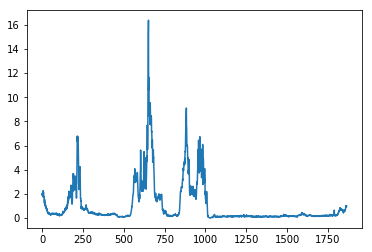

In [27]:
plt.plot(d.loc[(d.index.levels[0],'pm2_5'),].value_hrf.values)